## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [1]:
import warnings
warnings.filterwarnings('ignore') # 경고문구 없애기
import pandas as pd
import requests

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [81]:
page, page_size = 1, 10
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [82]:
response = requests.get(url)
response

<Response [200]>

In [83]:
response.text[:300]

'[{"localTradedAt":"2023-02-16","closePrice":"2,472.65","compareToPreviousClosePrice":"44.75","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.84","openPrice":"2,444.06","highPrice":"2,475.99","lowPrice":"2,442.07"},{"localTradedAt":"2023-02-15","closePrice":"2'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [84]:
type(response)

requests.models.Response

In [85]:
data = response.json()
type(data)

list

In [86]:
df = pd.DataFrame(data)[['localTradedAt', 'closePrice']]
df

,localTradedAt,closePrice
0,2023-02-16,"2,472.65"
1,2023-02-15,"2,427.90"
2,2023-02-14,"2,465.64"
3,2023-02-13,"2,452.70"
4,2023-02-10,"2,469.73"
5,2023-02-09,"2,481.52"
6,2023-02-08,"2,483.64"
7,2023-02-07,"2,451.71"
8,2023-02-06,"2,438.19"
9,2023-02-03,"2,480.40"


#### 4. 함수로 만들기

In [121]:
def stock_price(code="KOSPI", page=1, page_size=20):
    """This function is crawling stock price from naver
    Args: code (_str_): KOSPI or KOSDAQ
    page (_int_): int
    page_size (_int_): int Return: type : DataFrame 
    """
    # 1. URL
    url = f"https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}"
    
    # 2. requests(URL) > response : json(str)
    response = requests.get(url)
    
    # 3. json(str) > list, dict > DataFrame
    data = response.json()
    
    return pd.DataFrame(data)[["localTradedAt", "closePrice"]]

In [122]:
df = stock_price('KOSPI', 1, 20)
df.tail(2)

,localTradedAt,closePrice
18,2023-01-19,"2,380.34"
19,2023-01-18,"2,368.32"


In [89]:
help(stock_price) # shift + tab

Help on function stock_price in module __main__:

stock_price(code, page, page_size)
    this function is crawling stock price from naver.
    params:
        code : str : KOSPI, KOSDAQ
        page : int
        page_size : int
    return:
        type : DataFrame



In [90]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [91]:
print('A', 'B', sep=',', end='\t')
print('C')

A,B	C


In [92]:
type(response)

requests.models.Response

In [93]:
[var for var in dir(response) if var[0] != '_']

['apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [94]:
response.json

<bound method Response.json of <Response [200]>>

#### 5. 원달러 환율 데이터 수집 : 실습

In [110]:
def exchange_rate(code='FX_USDKRW', page = 1):
    # 1. URL
    url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode={code}'
    
    # 2. requests(URL) > response(json(str))
    response = requests.get(url)
    
    # 3. json(str) > list, dict > DataFrame
    data = response.json()['result']
    
    return pd.DataFrame(data)[['localTradedAt','closePrice']]
# def exchange_rate(code='FX_USDKRW', page=1):
#     # 1. URL
#     url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode={code}'
    
#     # 2. request(URL) > response(json(str))
#     response = requests.get(url)
    
#     # 3. json(str) > list, dict > DataFrame
#     data = response.json()
#     return pd.DataFrame(data)[['localTradedAt', 'closePrice']]
# #     return data

In [111]:
# exchange_rate()
usd_1 = exchange_rate(page=1)
usd_2 = exchange_rate(page=2)
usd_df = pd.concat([usd_1, usd_2], ignore_index = True)
usd_df.tail(2)

,localTradedAt,closePrice
18,2023-01-19,"1,237.00"
19,2023-01-18,"1,230.00"


In [114]:
kospi_df = stock_price()
kospi_df.tail(2)

,localTradedAt,closePrice
18,2023-01-19,"2,380.34"
19,2023-01-18,"2,368.32"


In [115]:
kosdaq_df = stock_price(code='KOSDAQ')
kosdaq_df.tail(2)

,localTradedAt,closePrice
18,2023-01-19,712.89
19,2023-01-18,711.75


In [116]:
# 데이터 전처리 : 데이터 타입 변경
usd_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
usd_df.dtypes

localTradedAt    object
closePrice       object
dtype: object

In [117]:
# 데이터 전처리 : 데이터 타입 변경
usd_1 = exchange_rate(page=1)
usd_2 = exchange_rate(page=2)
usd_df = pd.concat([usd_1, usd_2], ignore_index=True)
usd_df['usd'] = usd_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
usd_df.tail(2)

,localTradedAt,closePrice,usd
18,2023-01-19,"1,237.00",1237.0
19,2023-01-18,"1,230.00",1230.0


In [119]:
kospi_df, kosdaq_df = stock_price(), stock_price(code='KOSDAQ')
kospi_df['kospi'] = kospi_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
kosdaq_df['kosdaq'] = kosdaq_df['closePrice'].apply(lambda data: float(data.replace(',', '')))

In [123]:
df = usd_df.copy()
df['kospi'] = kospi_df['kospi']
df['kosdaq'] = kosdaq_df['kosdaq']
df = df.drop(columns=['closePrice'])
df.tail(2)

,localTradedAt,usd,kospi,kosdaq
18,2023-01-19,1237.0,2380.34,712.89
19,2023-01-18,1230.0,2368.32,711.75


In [125]:
# lambda: 파라미터와 리턴으로 이루어진 함수를 간단하게 작성하는 방법
def plus(n1, n2):
    return n1 + n2

def minus(n1, n2):
    return n1 - n2

def calc(func, n1, n2):
    return func(n1, n2)

In [127]:
calc(plus, 1, 2)

3

In [128]:
# plus 함수의 람다식
plus_lambda = lambda n1, n2: n1 + n2
plus_lambda(1, 2)

3

In [130]:
def calc(func, n1, n2):
    return func(n1, n2)
calc(lambda n1, n2: n1 + n2, 1, 2), calc(lambda n1, n2: n1 - n2, 1, 2)

(3, -1)

In [134]:
# 얕은 복사, 깊은 복사
data1 = [1, 2, 3]
data2 = data1 # 얕은복사
data3 = data1.copy() # 깊은복사
print(data1, data2, data3)
data1[1] = 4
print(data1, data2, data3)

[1, 2, 3] [1, 2, 3] [1, 2, 3]
[1, 4, 3] [1, 4, 3] [1, 2, 3]


In [135]:
id(data1), id(data2), id(data3)

(2334060075584, 2334060075584, 2334060074432)

#### 6. 시각화

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df.tail(2)

,localTradedAt,usd,kospi,kosdaq
18,2023-01-19,1237.0,2380.34,712.89
19,2023-01-18,1230.0,2368.32,711.75


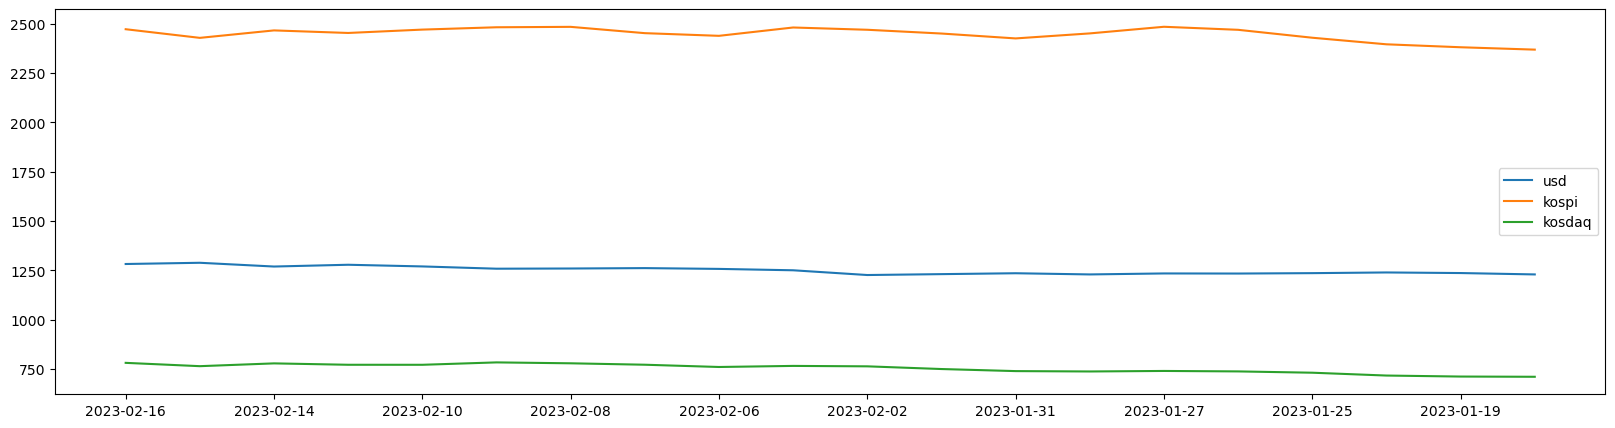

In [150]:
plt.figure(figsize=(20, 5))
plt.plot(df['localTradedAt'], df['usd'], label='usd')
plt.plot(df['localTradedAt'], df['kospi'], label='kospi')
plt.plot(df['localTradedAt'], df['kosdaq'], label='kosdaq')
plt.xticks(df['localTradedAt'][::2])
plt.legend()
plt.show()

In [151]:
# xticks_count = 10
df['localTradedAt'][::2]

0     2023-02-16
2     2023-02-14
4     2023-02-10
6     2023-02-08
8     2023-02-06
10    2023-02-02
12    2023-01-31
14    2023-01-27
16    2023-01-25
18    2023-01-19
Name: localTradedAt, dtype: object

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [153]:
from sklearn.preprocessing import minmax_scale

In [154]:
minmax_scale(df['usd'])

array([0.9       , 1.        , 0.69354839, 0.83870968, 0.7016129 ,
       0.51612903, 0.53225806, 0.56451613, 0.5       , 0.38709677,
       0.        , 0.07258065, 0.14516129, 0.0483871 , 0.12903226,
       0.12096774, 0.15322581, 0.20967742, 0.16129032, 0.0483871 ])

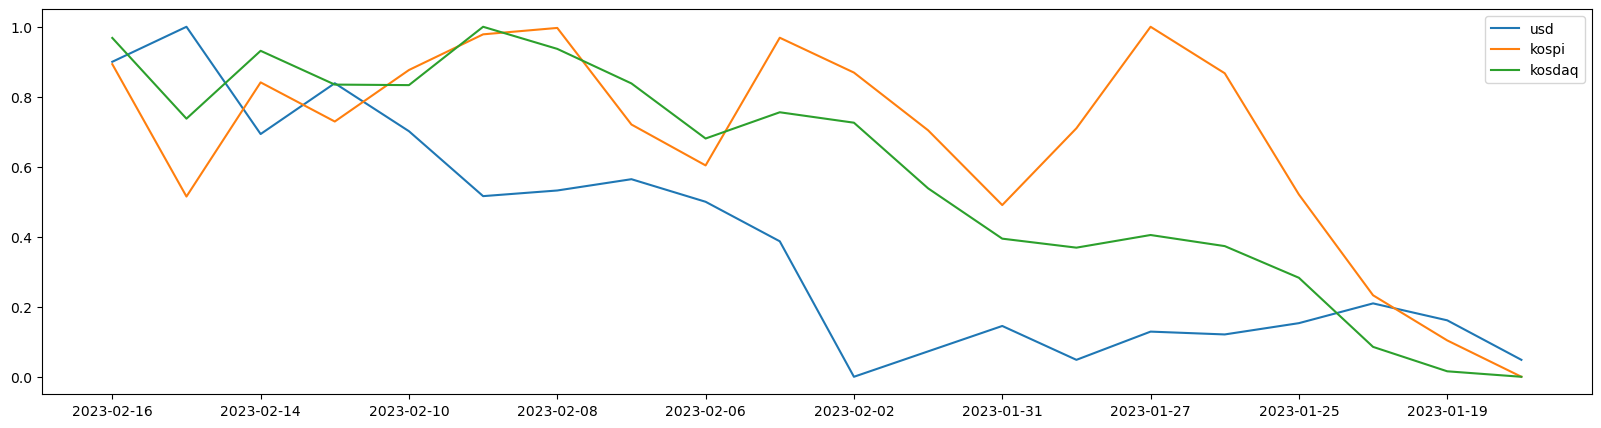

In [156]:
plt.figure(figsize=(20, 5))
plt.plot(df['localTradedAt'], minmax_scale(df['usd']), label='usd')
plt.plot(df['localTradedAt'], minmax_scale(df['kospi']), label='kospi')
plt.plot(df['localTradedAt'], minmax_scale(df['kosdaq']), label='kosdaq')
plt.xticks(df['localTradedAt'][::2])
plt.legend()
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [157]:
df.corr()

,usd,kospi,kosdaq
usd,1.000000,0.293831,0.72036
kospi,0.293831,1.000000,0.77924
kosdaq,0.720360,0.779240,1.00000


In [ ]:
# usd - kospi : -0.5
# kosdaq - kospi : 0.9